<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/Multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Image Classification

We've just been through a bunch of the following steps with a binary classification, now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data.
2. Preprocess the data (Get it ready for the model).
3. Create a model (start with a baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust the different hyperparameters and improve the model (try to beat the baseline/reduce overfitting).
7. Repeat until satisfied.


## Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-12-15 03:46:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   139MB/s    in 3.6s    

2021-12-15 03:46:36 (138 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the subdirectories (these are all our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Create view random image function

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # Setup the target directory(we'll view image from this directory)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape {img.shape}") # Show the shape of the image

  return img

['3653643.jpg']
Image Shape (512, 384, 3)


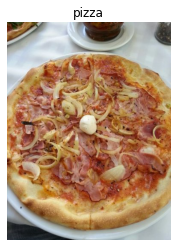

In [6]:
# Visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the model (prepare it for model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (start with a baseline)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model
model_1 = Sequential([
 Conv2D(10,3, input_shape=(224,224,3)),
 Activation(activation="relu"),
 Conv2D(10,3, activation=tf.keras.activations.relu),
 MaxPool2D(),
 Conv2D(10,3, activation="relu"),
 Conv2D(10,3, activation="relu"),
 MaxPool2D(),
 Flatten(),
 Dense(10, activation=tf.keras.activations.softmax)]) # Multiple class not binary therefore "10" and activation "softmax"

 # Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])               

## Fit a model

In [9]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 244ms/step - loss: 2.1388 - accuracy: 0.2209 - val_loss: 1.9857 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 58s 245ms/step - loss: 1.8794 - accuracy: 0.3515 - val_loss: 1.9339 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 1.4749 - accuracy: 0.5032 - val_loss: 2.0799 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 56s 239ms/step - loss: 0.8223 - accuracy: 0.7307 - val_loss: 2.6012 - val_accuracy: 0.2920
Epoch 5/5
235/235 [==============================] - 56s 239ms/step - loss: 0.2773 - accuracy: 0.9179 - val_loss: 3.6016 - val_accuracy: 0.2600


## Evaluate the model

In [11]:
  model_1.evaluate(test_data)

79/79 [==============================] - 23s 293ms/step - loss: 3.6016 - accuracy: 0.2600


[3.6015801429748535, 0.25999999046325684]

## Create a model loss curve function


In [12]:
def plot_loss_curves(history):

  """
  Returns different loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

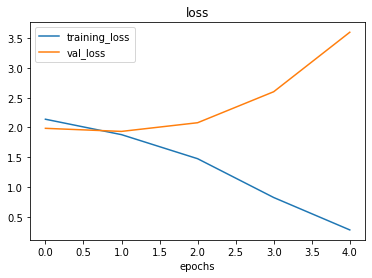

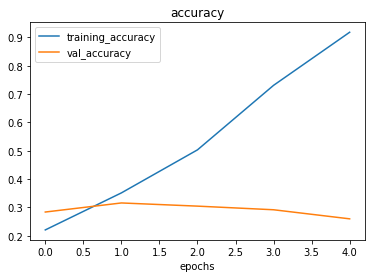

In [13]:
# Check the the model's loss curves on 10 classes
plot_loss_curves(history_1)

Model may be **overfitting** in the above experiment from the loss curves.

Some methods of fixing overfitting the data

* **Get more data** - having more data gives a model opportunity to learn diverse patterns..

* **Simplify the model** - It may be too complicated of a model, one way to simplify a model is to : reduce number of layers, Reudce number of hidden layers 

* **Data Augmentation** - Data augmentation manipulates the training data in such a way to add diversity to it (without altering the original data)

* **Use Transfer Learning** - transfer learning levarages patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.